# OSDG Community Data Analysis
### Installations & Imports

In [13]:
!pip install statsmodels

     |████████████████████████████████| 9.2 MB 4.4 MB/s            
     |████████████████████████████████| 28.7 MB 181.8 MB/s            
     |████████████████████████████████| 233 kB 190.4 MB/s            
     |████████████████████████████████| 10.8 MB 197.5 MB/s            
     |████████████████████████████████| 499 kB 142.4 MB/s            
You should consider upgrading via the '/Users/Jessie/Downloads/UZH/Thesis/zora_classifier/venv/bin/python -m pip install --upgrade pip' command.


In [42]:
!pip install matplotlib

     |████████████████████████████████| 7.3 MB 4.0 MB/s            
     |████████████████████████████████| 3.0 MB 127.2 MB/s            
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 63 kB 16.1 MB/s             
     |████████████████████████████████| 229 kB 192.0 MB/s            
     |████████████████████████████████| 1.0 MB 199.4 MB/s            
You should consider upgrading via the '/Users/Jessie/Downloads/UZH/Thesis/zora_classifier/venv/bin/python -m pip install --upgrade pip' command.


In [43]:
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

### Read in data

In [12]:
data = []

with open("data/osdg-community-data_unexported.tsv", "r", encoding="utf-8") as f:
    for line in f:
        line = line.rstrip("\n")
        line = line.split("\t")
        if "doi" not in line[0]:
            item = [line[4], line [5]]
            data.append(item)

[['1', '8'], ['2', '1'], ['1', '8'], ['1', '2'], ['2', '2'], ['2', '7'], ['2', '6'], ['0', '3'], ['0', '3'], ['1', '2']]


## Calculate IAA?

In [16]:
data_array = np.array(data)

kappa = statsmodels.stats.inter_rater.fleiss_kappa(data_array, method='fleiss')

print(kappa)

AttributeError: module 'statsmodels.stats' has no attribute 'inter_rater'

## Take existing IAA measure

In [29]:
data = []

with open("data/osdg-community-data_unexported.tsv", "r", encoding="utf-8") as f:
    for line in f:
        line = line.rstrip("\"\n")
        line = line.lstrip("\"")
        line = line.split("\t")
        if ("doi" not in line[0]) and (float(line[-1]) >= 0.5):
            data.append(line)

print(len(data))

28649


28,649 abstracts with IAA >= 0.5.

## Calculate distributions

In [36]:
abst_dist = Counter([i[2] for i in data])

print(abst_dist.most_common(10))

[('""From a gender perspective, Paulgaard points out that the labour markets of the fishing villages have been highly gender-segregated in terms of the existence of """"male jobs"""" and """"female jobs"""", however, the new business opportunities have led to the male population of the peripheral areas now working in the service industry in former """"female jobs"""": """"That boys and girls are doing the same jobs indicates change, because traditional boundaries between women and men\'s work are being crossed. But the fact that young people are still working represents continuity with the past"""" (Paulgaard 2002: 102). When Paulgaard refers to continuity with traditions, she refers to the expectations of young adults to participate in adult culture, thus these fishing villages traditionally have no actual youth culture. As described earlier, Paulgaard (2015) concludes that in some of Norway\'s peripheral areas school is still \'foreign\', a time waster stealing time from young adults

All abstracts are unique - each abstract was validated only once for one SDG.

### Per SDG

In [50]:
# Count abstracts/SDG
sdg_dist = Counter([i[3] for i in data])

# Convert SDG label strings into integers for easy sorting
sdg_dist = {int(k): v for k,v in sdg_dist.items()}
sdg_dist = dict(sorted(sdg_dist.items()))

Counter({'16': 3615, '5': 3401, '4': 2983, '7': 2398, '3': 2187, '6': 1879, '1': 1743, '11': 1616, '13': 1535, '2': 1386, '15': 1113, '8': 1104, '9': 1066, '14': 960, '10': 945, '12': 718})


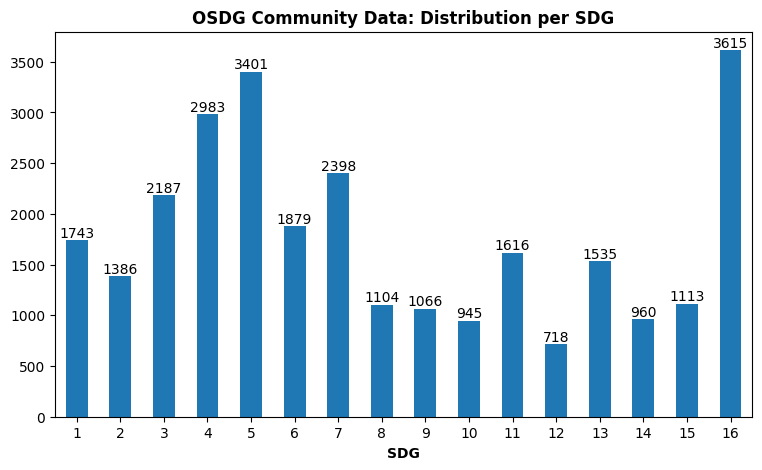

In [71]:
df = pd.DataFrame(list(sdg_dist.items()), columns=['SDG', 'Num. abstracts'])

sdg_graph = df.plot(x='SDG', y='Num. abstracts', kind='bar', rot=0, legend=False, figsize=(9,5))

# Label bars with exact y-vals
for p in sdg_graph.patches:
    sdg_graph.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('OSDG Community Data: Distribution per SDG', weight='bold')
plt.xlabel('SDG', weight='bold')

plt.savefig('data/sdg_dist.png', dpi=300, bbox_inches='tight')

## Write out subset files

### High IAA

In [72]:
with open("data/osdg-community-data_high_IAA.tsv", "w", encoding="utf-8") as f:
    f.write("doi\ttext_id\ttext\tsdg\tlabels_negative\tlabels_positive\tagreement\n")
    for i in data:
        f.write("\t".join(i) + "\n")

### SDG distribution